In [113]:
import wikipedia as wp
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

plt.style.use('dark_background')

In [26]:
page1 = wp.page("Veterans day").content
page2 = wp.page("Independence Day (India)").content
page3 = wp.page("Academy awards").content
page4 = wp.page("Golden globe awards").content
page5 = wp.page("Basketball").content

In [91]:
pages = [page1, page2, page3, page4, page5]
titles = ['Veterans day', 'Independence Day (India)', 'Academy awards', 'Golden globe awards', 'Basketball']

## 10 most common words in each document

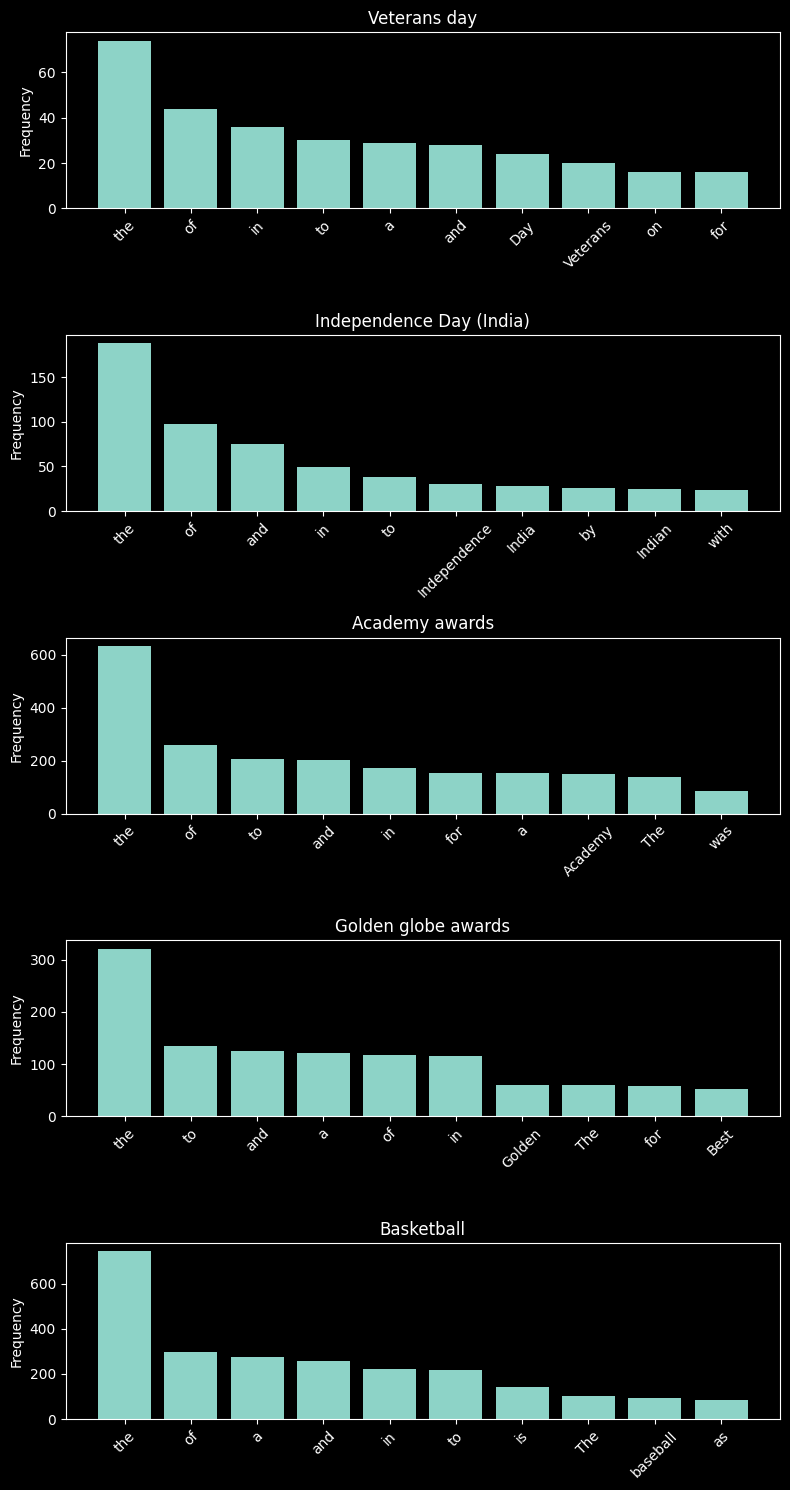

In [92]:
pages_10 = []
for i,page in enumerate(pages):
    pages_10.append(Counter(page.split()).most_common(10))

def plot_word_frequencies(words_pages, titles):
    num_pages = len(words_pages)
    fig, axes = plt.subplots(num_pages, 1, figsize=(8, num_pages * 3))
    
    for i, (words_page, title) in enumerate(zip(words_pages, titles)):
        axes[i].bar(range(len(words_page)), [word[1] for word in words_page])
        axes[i].set_xticks(range(len(words_page)))
        axes[i].set_xticklabels([word[0] for word in words_page], rotation=45)
        # axes[i].set_xlabel('Words')
        axes[i].set_ylabel('Frequency')
        axes[i].set_title(title)
    
    plt.tight_layout()
    plt.show()

plot_word_frequencies(pages_10, titles)


## Compute distance btw word vectors

In [175]:
all_pages_combined = " ".join(pages)
unique_words = list(set(all_pages_combined.split()))
unique_words = sorted(unique_words)
vocab_size = len(unique_words)  

unique_words = {word: i for i, word in enumerate(unique_words)}
unique_words_matrix = np.zeros((len(pages), len(unique_words)))

# Populate the unique_words_matrix with word frequencies
for i, page in enumerate(pages):
    word_counts = Counter(page.split())
    for word, count in word_counts.items():
        unique_words_matrix[i, unique_words[word]] = count

print("Vocab size: ", vocab_size)

Vocab size:  7463


In [176]:
def visualize_similarity_matrix(similarity_matrix, titles, pages):
    figure, axis = plt.subplots(figsize=(10, 8))
    color_axis = axis.matshow(similarity_matrix, cmap='viridis')

    for i in range(len(pages)):
        for j in range(len(pages)):
            axis.text(j, i, f'{similarity_matrix[i, j]:.2f}', ha='center', va='center', color='white')
    axis.set_xticks(range(len(pages)))
    axis.set_yticks(range(len(pages)))
    axis.set_xticklabels(titles, fontsize=8)
    axis.set_yticklabels(titles, fontsize=8)

    color_bar = figure.colorbar(color_axis)
    color_bar.ax.set_ylabel('Similarity', rotation=270, labelpad=15)

    plt.title('Distance Matrix')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

## Euclidean  distance

In [171]:
distance = np.linalg.norm(unique_words_matrix[0] - unique_words_matrix[1]) / vocab_size
print("L2 distance: ", distance)

L2 distance:  0.022083069341371803


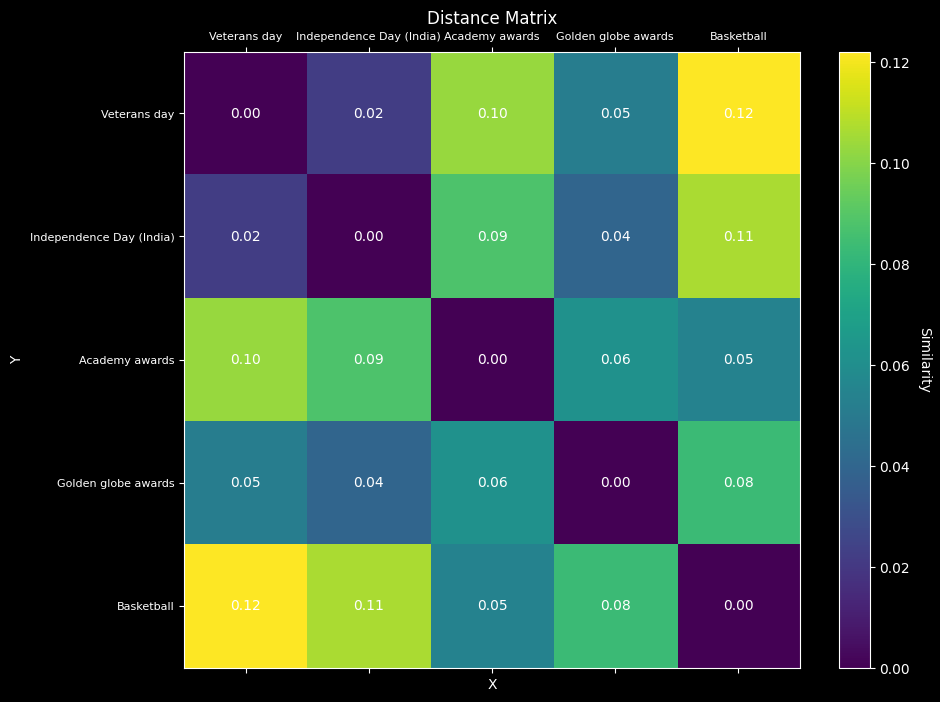

In [178]:
similarity_matrix = np.zeros((len(pages), len(pages)))

for i in range(len(pages)):
    for j in range(len(pages)):
        similarity_matrix[i, j] = np.linalg.norm(unique_words_matrix[i] - unique_words_matrix[j]) / vocab_size

visualize_similarity_matrix(similarity_matrix, titles, pages)

## Cosine similarity (TBD)

Dot product:  27152.0
Cosine similarity:  0.8431411268497223
